In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정 (설치한 폰트 경로로 변경)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 나눔고딕 폰트 경로

# 한글 폰트 설정
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib에서 한글 폰트로 설정
plt.rcParams['font.family'] = font_prop.get_name()

In [140]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

---

### 대회에서 선수들은 어떤 총으로 교전을 했을까 
#### 1. 총기 분류별 피해량 비율

선수들이 1번과 2번 총기에 각각 AR 1자루, DMR 또는 SR 1자루를 장착한다고 가정

AR 총기 종류<br/>
WeapBerylM762_C,
WeapHK416_C,
WeapACE32_C,
WeapAK47_C,
WeapP90_C,
WeapSCAR-L_C,
WeapMk47Mutant_C, 
WeapM16A4_C, 
WeapG36C_C,
WeapK2_C,
WeapFamasG2_C,
WeapGroza_C,
WeapAUG_C,
WeapMG3_C,
WeapM249_C,

DMR 총기 종류<br/>
WeapMini14_C,
WeapMk12_C,
WeapSKS_C,
WeapFNFal_C,
WeapDragunov_C,
WeapMk14_C,

SR 총기 종류<br/>
WeapKar98k_C,
WeapM24_C,
WeapAWM_C,
WeapWinchester_C,
WeapMosinNagant_C,

In [141]:
damage_s_matches = pd.read_csv('./csv/damage_s_matches.csv')
damage_s_matches

,teamid,name,weapon,damage
0,1,CES_HaiSaki,BP_CoupeRB_C,3.273954
1,1,CES_HaiSaki,BP_Niva_04_C,43.113449
2,1,CES_HaiSaki,BP_Niva_Esports_C,7.539061
3,1,CES_HaiSaki,BP_PickupTruck_A_04_C,2.565684
4,1,CES_HaiSaki,BP_PickupTruck_A_05_C,8.382923
...,...,...,...,...
917,16,TWIS_spyrro,WeapAUG_C,1602.914918
918,16,TWIS_spyrro,WeapBerylM762_C,79.795840
919,16,TWIS_spyrro,WeapHK416_C,148.953010
920,16,TWIS_spyrro,WeapMini14_C,393.139406


In [142]:
# 총기류만 보기
weapon_df = damage_s_matches[damage_s_matches['weapon'].str.startswith('Weap')]
weapon_df = weapon_df[~weapon_df['weapon'].str.contains('WeapPanzerFaust100M1_C')]
weapon_df

,teamid,name,weapon,damage
10,1,CES_HaiSaki,WeapAUG_C,98.571686
11,1,CES_HaiSaki,WeapBerylM762_C,99.940148
12,1,CES_HaiSaki,WeapDragunov_C,93.826920
13,1,CES_HaiSaki,WeapG36C_C,267.532511
14,1,CES_HaiSaki,WeapHK416_C,506.067211
...,...,...,...,...
917,16,TWIS_spyrro,WeapAUG_C,1602.914918
918,16,TWIS_spyrro,WeapBerylM762_C,79.795840
919,16,TWIS_spyrro,WeapHK416_C,148.953010
920,16,TWIS_spyrro,WeapMini14_C,393.139406


In [143]:
weapon_df['weapon'].value_counts()

WeapAUG_C            62
WeapMk12_C           62
WeapMini14_C         61
WeapHK416_C          49
WeapBerylM762_C      46
WeapFNFal_C          44
WeapDragunov_C       32
WeapACE32_C          21
WeapSKS_C            14
WeapM249_C            8
WeapFamasG2_C         7
WeapKar98k_C          6
WeapM16A4_C           5
WeapAK47_C            5
WeapGroza_C           5
WeapP90_C             4
WeapWinchester_C      4
WeapMosinNagant_C     4
WeapAWM_C             3
WeapMG3_C             3
WeapSCAR-L_C          3
WeapSawnoff_C         3
WeapMk14_C            2
WeapMk47Mutant_C      2
WeapDP12_C            2
WeapM24_C             1
WeapBerreta686_C      1
WeapK2_C              1
WeapG36C_C            1
WeapBizonPP19_C       1
WeapM9_C              1
WeapUMP_C             1
Name: weapon, dtype: int64

In [144]:
AR = ["WeapBerylM762_C", "WeapHK416_C", "WeapACE32_C", "WeapAK47_C", "WeapP90_C", "WeapSCAR-L_C",
      "WeapMk47Mutant_C", "WeapM16A4_C", "WeapG36C_C", "WeapK2_C", "WeapFamasG2_C", "WeapGroza_C",
      "WeapAUG_C", "WeapMG3_C", "WeapM249_C"]
DMR = ["WeapMini14_C", "WeapMk12_C", "WeapSKS_C", "WeapFNFal_C", "WeapDragunov_C", "WeapMk14_C"]
SR = ["WeapKar98k_C", "WeapM24_C", "WeapAWM_C", "WeapWinchester_C", "WeapMosinNagant_C"]

def classify_weapon(weapon_name):
    if weapon_name in AR:
        return 'AR'
    elif weapon_name in DMR:
        return 'DMR'
    elif weapon_name in SR:
        return 'SR'
    else:
        return 'ETC'

weapon_df['Category'] = weapon_df['weapon'].apply(classify_weapon)

grouped_damage = weapon_df.groupby('Category')['damage'].sum().reset_index()
grouped_damage = grouped_damage.sort_values(by='damage', ascending=False)
grouped_damage

,Category,damage
1,DMR,113427.386665
0,AR,99343.976754
3,SR,2143.323097
2,ETC,988.632102


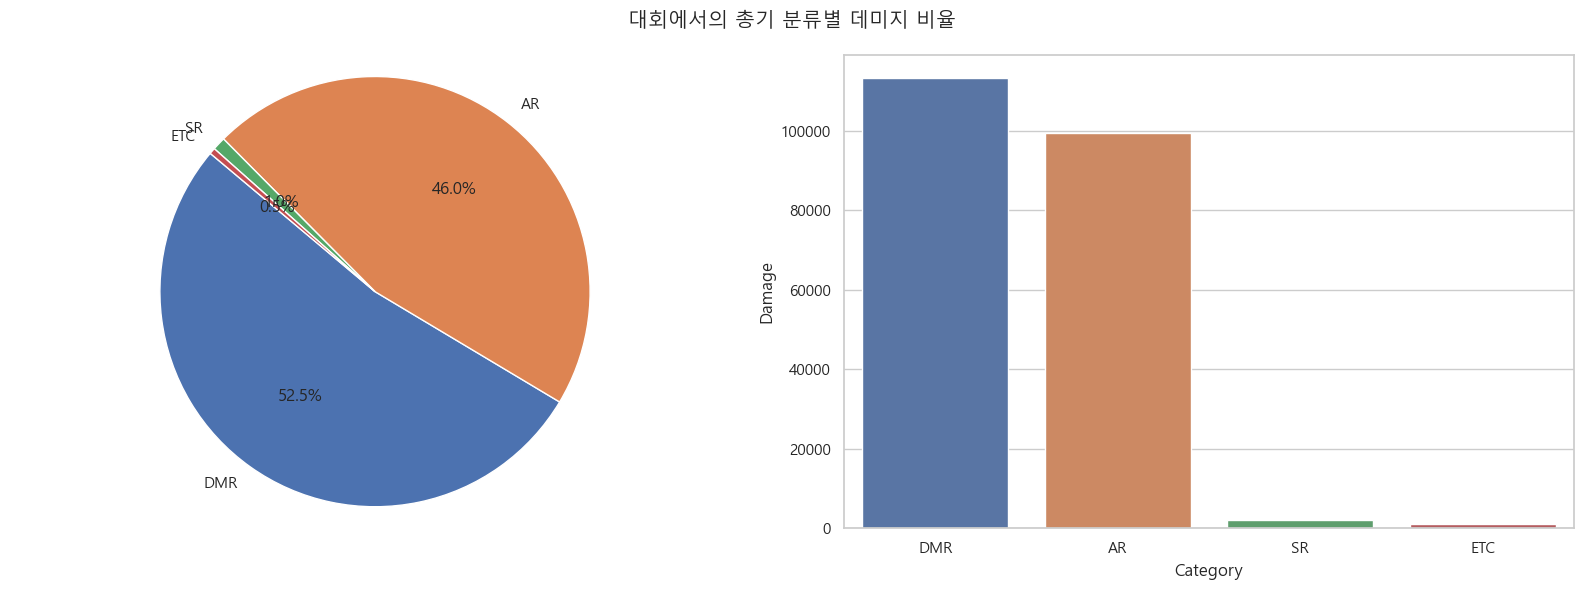

In [145]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1행 2열의 서브플롯 생성

# 첫 번째 그래프 (파이 차트)
ax1.pie(grouped_damage['damage'], labels=grouped_damage['Category'], autopct='%1.1f%%', startangle=140)
ax1.axis('equal')

# 두 번째 그래프 (막대 그래프)
sns.barplot(x='Category', y='damage', data=grouped_damage, ax=ax2)
ax2.set_xlabel('Category')
ax2.set_ylabel('Damage')

fig.suptitle('대회에서의 총기 분류별 데미지 비율')
plt.tight_layout()
plt.show()

---

### 대회에서 선수들은 어떤 총으로 교전을 했을까 
#### 2. 투척이 포함된 경우

In [146]:
weapon_df = damage_s_matches[damage_s_matches['weapon'].str.startswith('Weap') | damage_s_matches['weapon'].str.startswith('Proj')\
    | damage_s_matches['weapon'].str.startswith('Blue')]
weapon_df = weapon_df[~weapon_df['weapon'].str.contains('WeapPanzerFaust100M1_C')]
weapon_df

,teamid,name,weapon,damage
9,1,CES_HaiSaki,ProjGrenade_C,132.481081
10,1,CES_HaiSaki,WeapAUG_C,98.571686
11,1,CES_HaiSaki,WeapBerylM762_C,99.940148
12,1,CES_HaiSaki,WeapDragunov_C,93.826920
13,1,CES_HaiSaki,WeapG36C_C,267.532511
...,...,...,...,...
917,16,TWIS_spyrro,WeapAUG_C,1602.914918
918,16,TWIS_spyrro,WeapBerylM762_C,79.795840
919,16,TWIS_spyrro,WeapHK416_C,148.953010
920,16,TWIS_spyrro,WeapMini14_C,393.139406


In [147]:
THROW = ["ProjGrenade_C", "ProjMolotov_C", "Bluezonebomb_EffectActor_C"]

def classify_weapon(weapon_name):
    if weapon_name in AR:
        return 'AR'
    elif weapon_name in DMR:
        return 'DMR'
    elif weapon_name in SR:
        return 'SR'
    elif weapon_name in THROW:
        return 'THROW'
    else:
        return 'ETC'

weapon_df['Category'] = weapon_df['weapon'].apply(classify_weapon)

grouped_damage = weapon_df.groupby('Category')['damage'].sum().reset_index()
grouped_damage = grouped_damage.sort_values(by='damage', ascending=False)
grouped_damage

,Category,damage
1,DMR,113427.386665
0,AR,99343.976754
4,THROW,20184.228406
3,SR,2143.323097
2,ETC,988.632102


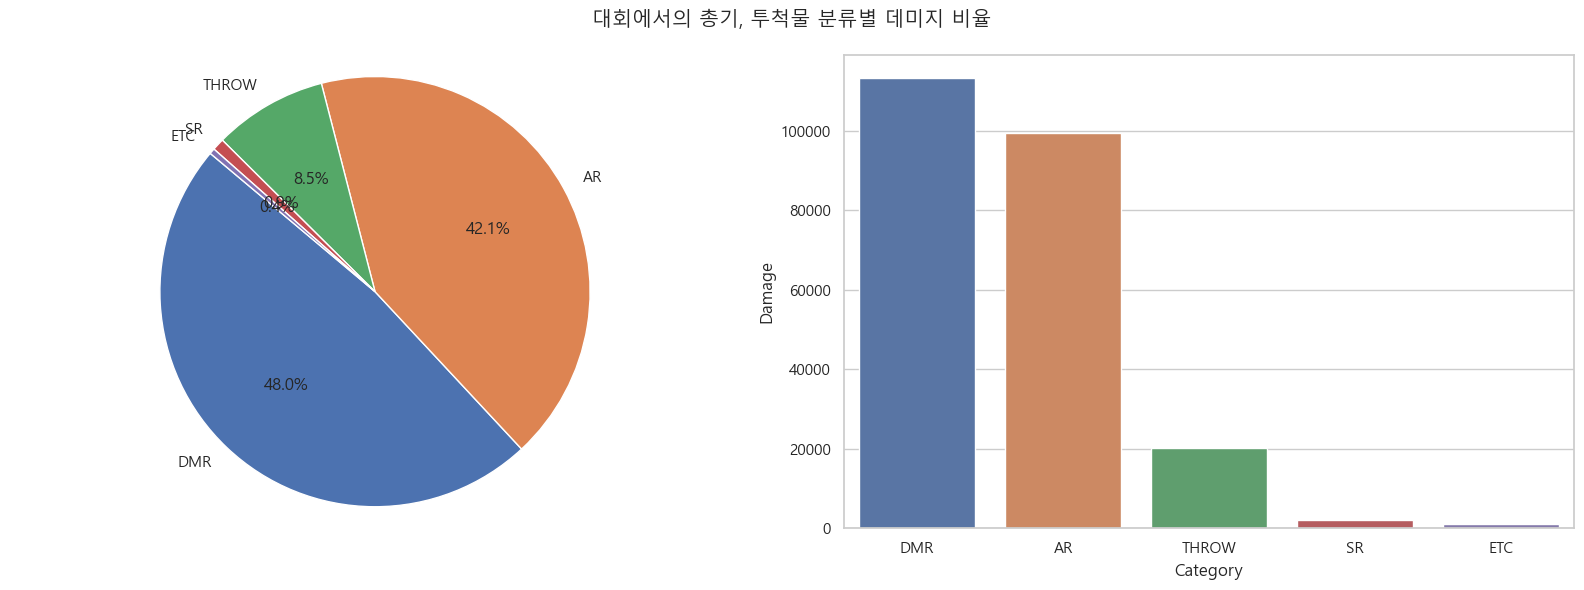

In [148]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1행 2열의 서브플롯 생성

# 첫 번째 그래프 (파이 차트)
ax1.pie(grouped_damage['damage'], labels=grouped_damage['Category'], autopct='%1.1f%%', startangle=140)
ax1.axis('equal')

# 두 번째 그래프 (막대 그래프)
sns.barplot(x='Category', y='damage', data=grouped_damage, ax=ax2)
ax2.set_xlabel('Category')
ax2.set_ylabel('Damage')

fig.suptitle('대회에서의 총기, 투척물 분류별 데미지 비율')
plt.tight_layout()
plt.show()

---

### 대회에서 선수들은 어떤 총으로 교전을 했을까 
#### 3. 팀별 분류

In [150]:
weapon_t_df = weapon_df
weapon_t_df['Category'] = weapon_t_df['weapon'].apply(classify_weapon)

grouped_damage = weapon_t_df.groupby(['teamid', 'Category'])['damage'].sum().reset_index()
grouped_damage

,teamid,Category,damage
0,1,AR,10296.929632
1,1,DMR,9959.124594
2,1,ETC,27.030001
3,1,THROW,867.276908
4,2,AR,5695.550658
...,...,...,...
60,15,THROW,1228.993821
61,16,AR,7294.739489
62,16,DMR,9310.292207
63,16,SR,74.006287


In [151]:
grouped_damage[grouped_damage['teamid'] == 10]

,teamid,Category,damage
38,10,AR,7491.187503
39,10,DMR,11678.420683
40,10,THROW,1126.116310


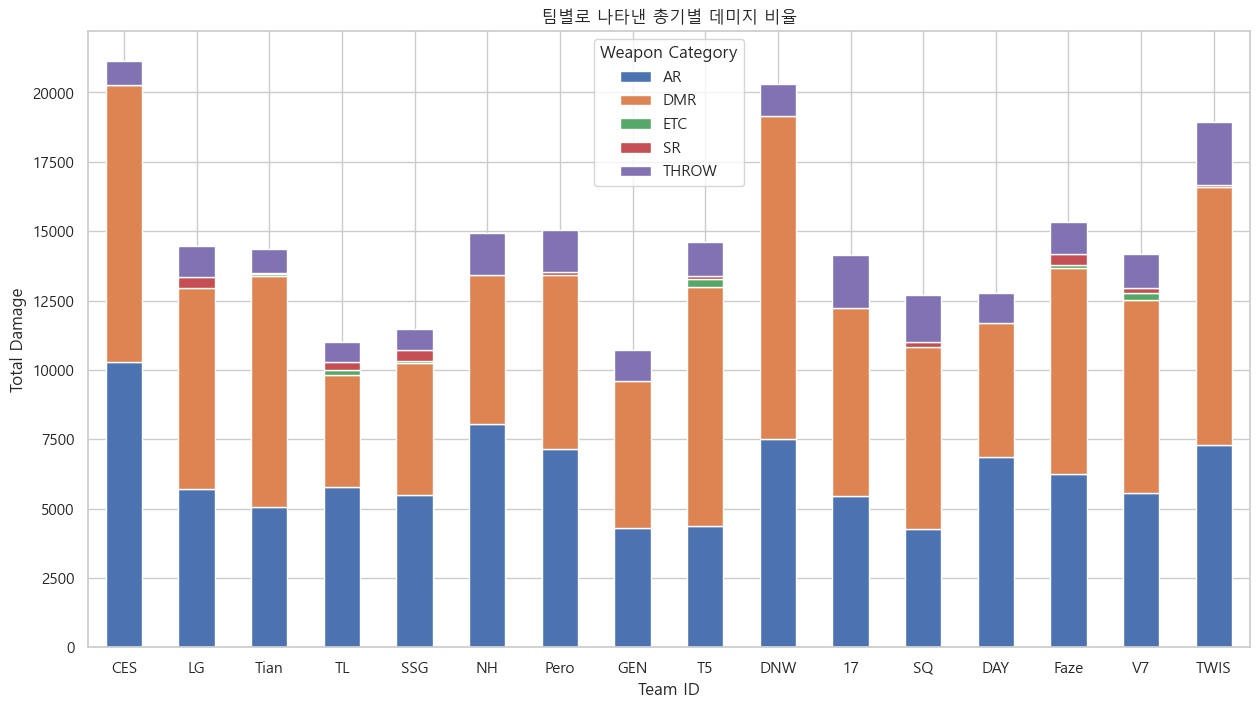

In [152]:
team_names = {1: 'CES', 2: 'LG', 3: 'Tian', 4: 'TL', 5: 'SSG', 6: 'NH', 7: 'Pero', 8: 'GEN',
              9: 'T5', 10: 'DNW', 11: '17', 12: 'SQ', 13: 'DAY', 14: 'Faze', 15: 'V7', 16: 'TWIS'}

pivot_data = grouped_damage.pivot(index='teamid', columns='Category', values='damage').fillna(0)
pivot_data.rename(index=team_names, inplace=True)

pivot_data.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('팀별로 나타낸 총기별 데미지 비율')
plt.xlabel('Team ID')
plt.xticks(rotation=0)
plt.ylabel('Total Damage')
plt.legend(title='Weapon Category')
plt.show()

---

In [153]:
### 대회에서 선수들은 어떤 총으로 교전을 했을까 
#### 4. 다나와 vs 나머지 팀 평균

In [154]:
total_damage = grouped_damage

dnw_damage = total_damage[total_damage['teamid'] == 10].drop('teamid', axis=1)
other_damage = total_damage[total_damage['teamid'] != 10]
other_damage = other_damage.groupby('Category')['damage'].mean().reset_index()

dnw_damage, other_damage

(   Category        damage
 38       AR   7491.187503
 39      DMR  11678.420683
 40    THROW   1126.116310,
   Category       damage
 0       AR  6123.519283
 1      DMR  6783.264399
 2      ETC   141.233157
 3       SR   214.332310
 4    THROW  1270.540806)

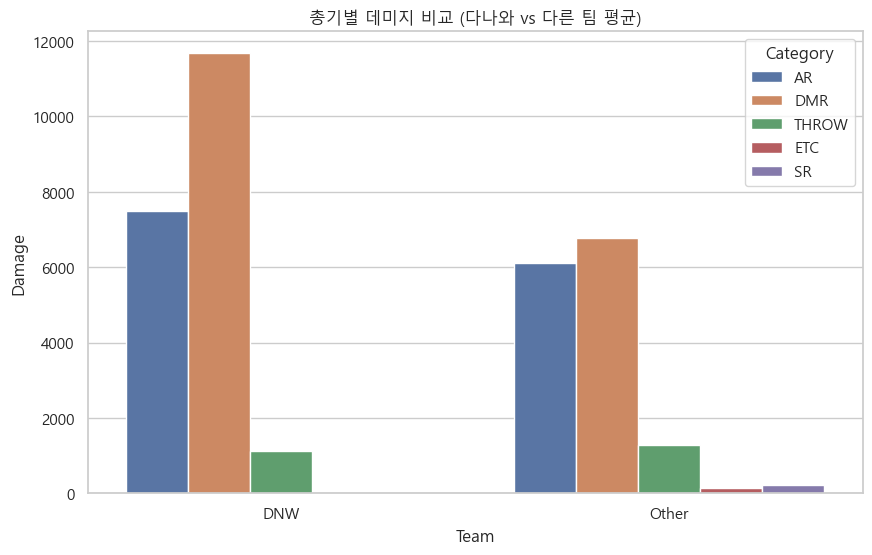

In [155]:
dnw_damage = dnw_damage.sort_values(by='Category')
other_damage = other_damage.sort_values(by='Category')

# 'DNW'와 'Other'를 나타내는 열 추가
dnw_damage['Group'] = 'DNW'
other_damage['Group'] = 'Other'

# 데이터프레임 합치기
merged_df = pd.concat([dnw_damage, other_damage])

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='Group', y='damage', hue='Category', data=merged_df)
plt.xlabel('Team')
plt.ylabel('Damage')
plt.title('총기별 데미지 비교 (다나와 vs 다른 팀 평균)')
plt.show()

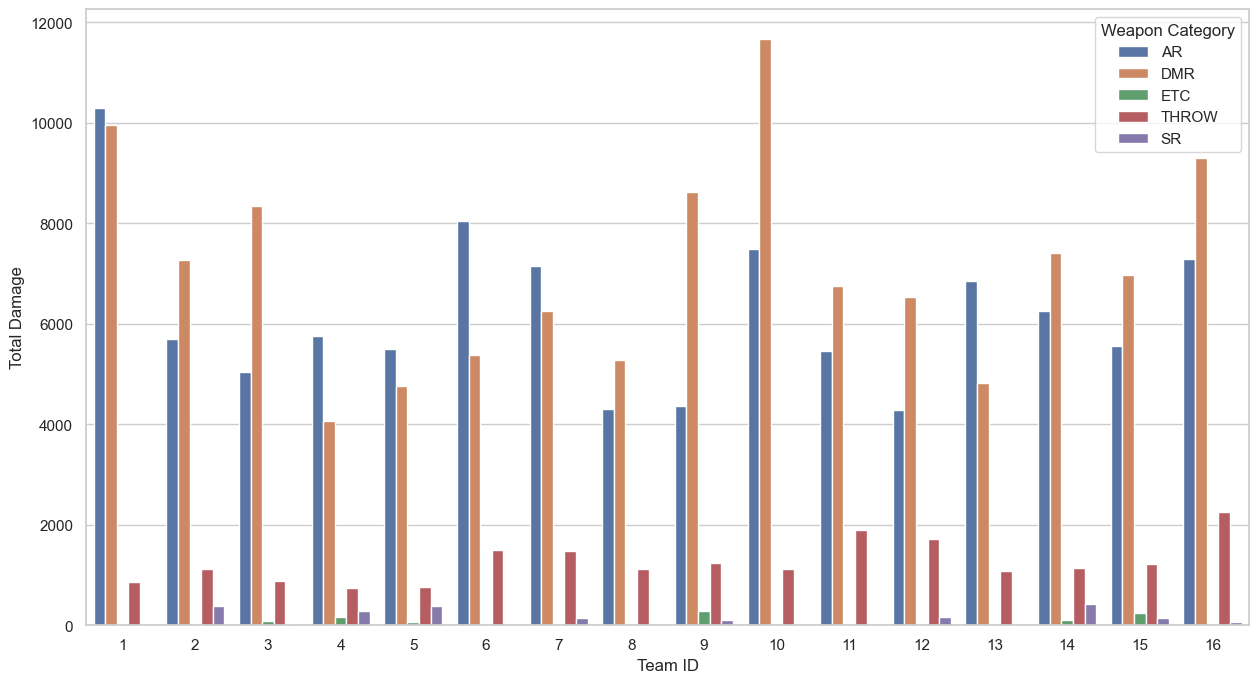

In [157]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 8))
sns.barplot(x='teamid', y='damage', hue='Category', data=grouped_damage)

plt.xlabel('Team ID')
plt.ylabel('Total Damage')
plt.legend(title='Weapon Category')
plt.show()

### 대회에서 선수들은 어떤 총으로 교전을 했을까 
#### 5. 데미지와 최종 순위와의 상관관계?

In [159]:
# 각 팀의 전체 데미지
total_damage = grouped_damage
total_damage = grouped_damage.groupby('teamid')['damage'].sum().reset_index()
total_damage

,teamid,damage
0,1,21150.361134
1,2,14471.471203
2,3,14370.567980
3,4,11014.432830
4,5,11483.089021
5,6,14928.244754
6,7,15029.345772
7,8,10702.749270
8,9,14619.326306
9,10,20295.724496


In [160]:
rank_dict = {10: 1, 11: 2, 16: 3, 7: 4, 6: 5, 14: 6, 1: 7, 2: 8, 3: 9, 15: 10, 12: 11, 5: 12, 13: 13, 4: 14, 9: 15, 8: 16}
rank_df = pd.DataFrame(list(rank_dict.items()), columns=['teamid', 'rank'])

merged_data = pd.merge(total_damage, rank_df, on='teamid')

correlation = merged_data['damage'].corr(merged_data['rank'])

print('Correlation:', correlation)

Correlation: -0.6956191927535833


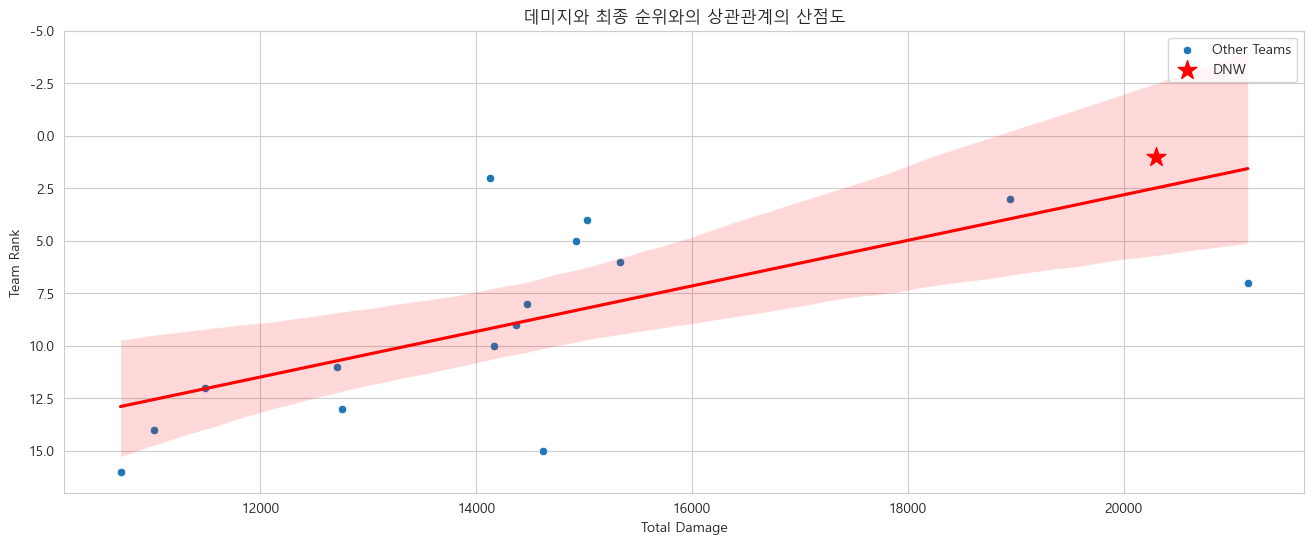

In [77]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='damage', y='rank', data=merged_data, label='Other Teams')

dnw_data = merged_data[merged_data['teamid'] == 10]
plt.scatter(dnw_data['damage'], dnw_data['rank'], color='red', marker='*', s=200, label='DNW')

sns.regplot(x='damage', y='rank', data=merged_data, scatter=False, color='red')

plt.gca().invert_yaxis()
plt.title('데미지와 최종 순위와의 상관관계의 산점도')
plt.xlabel('Total Damage')
plt.ylabel('Team Rank')
plt.legend()
plt.show()

---

### 대회에서 선수들은 어떤 총으로 교전을 했을까 
#### 6. 데미지와 매치별 순위의 평균과의 상관관계?

In [89]:
# 순위포인트로 변경
match_rank_df = pd.read_csv('./csv/rank.csv')
match_rank_df

,teamid,rank_0,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10,rank_11,rank_12,rank_13,rank_14,rank_15,rank_16,rank_17
0,1,4,7,11,15,13,13,3,14,7,12,5,3,14,5,15,16,15,3
1,2,16,6,15,5,15,4,6,4,16,5,16,12,11,10,11,2,2,16
2,3,9,16,5,1,10,14,15,8,6,2,4,11,4,3,8,13,14,5
3,4,11,13,14,7,5,3,14,1,12,9,15,10,7,8,2,12,3,11
4,5,13,15,9,12,9,7,2,5,10,14,14,15,9,2,6,1,11,12
5,6,10,5,6,10,11,8,5,13,5,16,11,6,12,13,4,6,7,8
6,7,15,9,10,6,14,12,10,6,11,11,2,16,6,1,14,14,5,13
7,8,14,1,4,8,8,1,16,10,15,8,6,8,3,14,16,7,12,10
8,9,1,4,2,9,4,6,13,7,4,15,10,4,1,4,12,10,16,9
9,10,8,3,1,16,16,10,11,12,1,3,13,7,10,7,9,3,9,14


In [90]:
match_rank_df['rank_avg'] = match_rank_df.iloc[:, 1:].mean(axis=1)
match_rank_df = match_rank_df.drop(match_rank_df.iloc[:, 1:19], axis=1)
match_rank_df

,teamid,rank_avg
0,1,9.722222
1,2,9.555556
2,3,8.222222
3,4,8.722222
4,5,9.222222
5,6,8.666667
6,7,9.722222
7,8,8.944444
8,9,7.277778
9,10,8.500000


In [95]:
match_merged_data = pd.merge(total_damage, match_rank_df, on='teamid')

correlation = match_merged_data['damage'].corr(match_merged_data['rank_avg'])

print('Correlation:', correlation)

Correlation: 0.1281661229983886


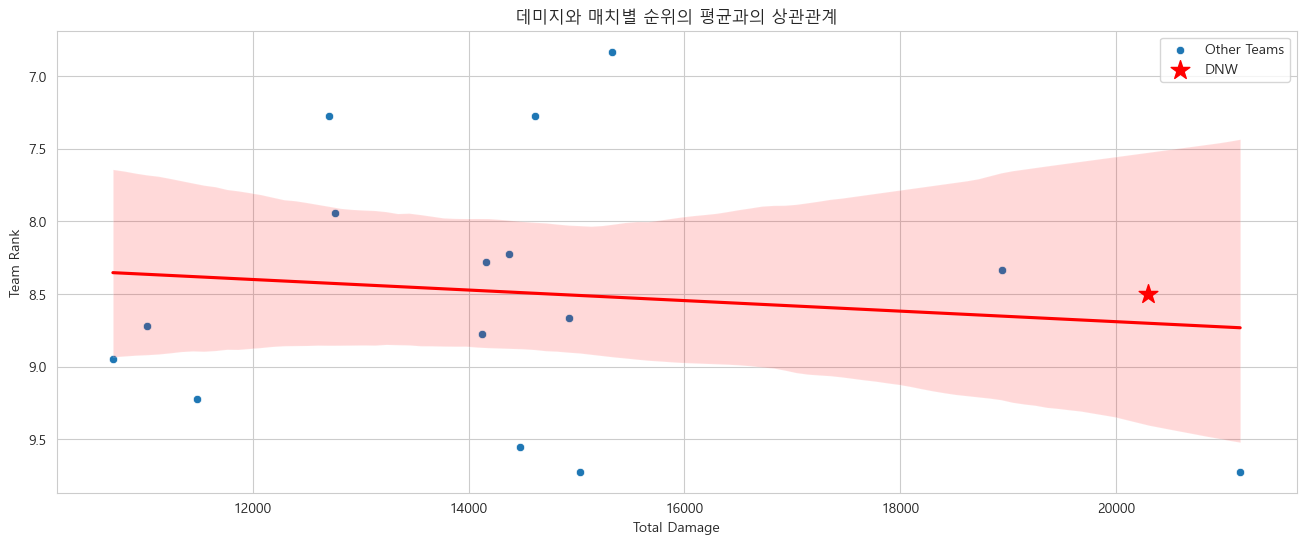

In [100]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='damage', y='rank_avg', data=match_merged_data, label='Other Teams')

match_dnw_data = match_merged_data[match_merged_data['teamid'] == 10]
plt.scatter(match_dnw_data['damage'], match_dnw_data['rank_avg'], color='red', marker='*', s=200, label='DNW')

sns.regplot(x='damage', y='rank_avg', data=match_merged_data, scatter=False, color='red')

plt.gca().invert_yaxis()
plt.title('데미지와 매치 평균 순위와의 상관관계')
plt.xlabel('Total Damage')
plt.ylabel('Team Rank')
plt.legend()
plt.show()

### 대회에서 선수들은 어떤 총으로 교전을 했을까 
#### 7. 데미지와 순위 점수와의 상관관계?


In [104]:
rank_pt_dict = {1: 41, 2: 36, 3: 27, 4: 20, 5: 25, 6: 44, 7: 36, 8: 23, 9: 34, 10: 51, 11: 55, 12: 30, 13: 23, 14: 43, 15: 37, 16: 51}
rank_pt_df = pd.DataFrame(list(rank_pt_dict.items()), columns=['teamid', 'rank_pt'])
rank_pt_df

,teamid,rank_pt
0,1,41
1,2,36
2,3,27
3,4,20
4,5,25
5,6,44
6,7,36
7,8,23
8,9,34
9,10,51


In [105]:
point_merged_data = pd.merge(total_damage, rank_pt_df, on='teamid')

correlation = point_merged_data['damage'].corr(point_merged_data['rank_pt'])

print('Correlation:', correlation)

Correlation: 0.7227049761895409


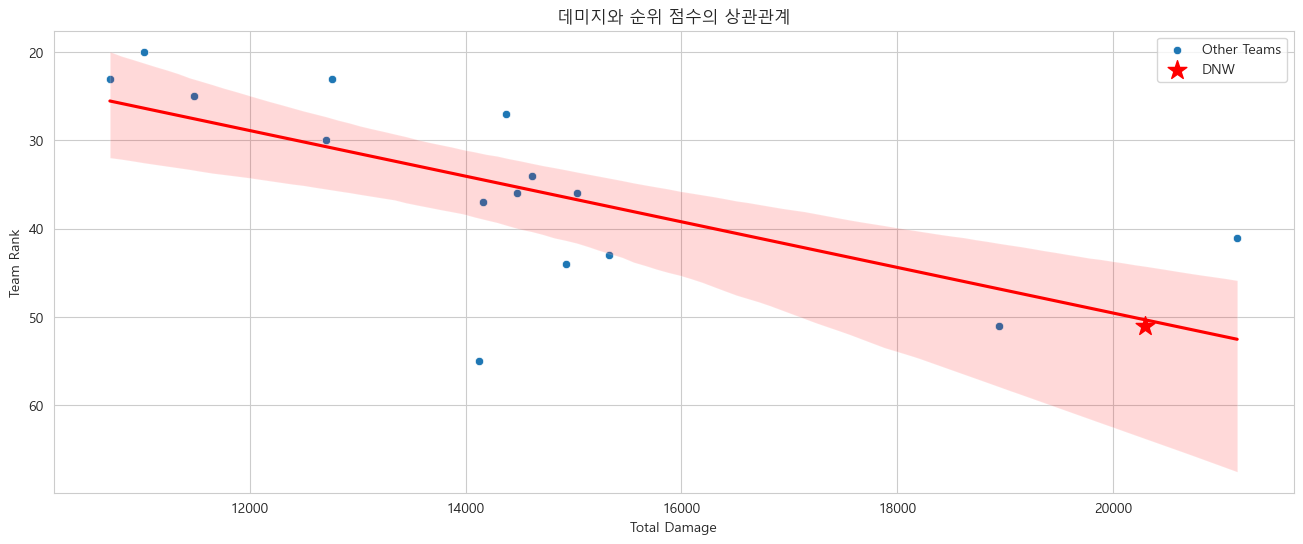

In [108]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='damage', y='rank_pt', data=point_merged_data, label='Other Teams')

pt_dnw_data = point_merged_data[point_merged_data['teamid'] == 10]
plt.scatter(pt_dnw_data['damage'], pt_dnw_data['rank_pt'], color='red', marker='*', s=200, label='DNW')

sns.regplot(x='damage', y='rank_pt', data=point_merged_data, scatter=False, color='red')

plt.gca().invert_yaxis()
plt.title('데미지와 대회 전체 순위 점수의 상관관계')
plt.xlabel('Total Damage')
plt.ylabel('Team Rank')
plt.legend()
plt.show()

---

### 대회에서 선수들은 어떤 총으로 교전을 했을까 
#### 1. 탄약 분류별 총기 사용 비율

In [135]:
damage_s_matches = pd.read_csv('./csv/damage_s_matches.csv')
damage_s_matches

,teamid,name,weapon,damage
0,1,CES_HaiSaki,BP_CoupeRB_C,3.273954
1,1,CES_HaiSaki,BP_Niva_04_C,43.113449
2,1,CES_HaiSaki,BP_Niva_Esports_C,7.539061
3,1,CES_HaiSaki,BP_PickupTruck_A_04_C,2.565684
4,1,CES_HaiSaki,BP_PickupTruck_A_05_C,8.382923
...,...,...,...,...
917,16,TWIS_spyrro,WeapAUG_C,1602.914918
918,16,TWIS_spyrro,WeapBerylM762_C,79.795840
919,16,TWIS_spyrro,WeapHK416_C,148.953010
920,16,TWIS_spyrro,WeapMini14_C,393.139406


In [136]:
# 총기류만 보기
weapon_df = damage_s_matches[damage_s_matches['weapon'].str.startswith('Weap')]
weapon_df = weapon_df[~weapon_df['weapon'].str.contains('WeapPanzerFaust100M1_C')]
weapon_df

,teamid,name,weapon,damage
10,1,CES_HaiSaki,WeapAUG_C,98.571686
11,1,CES_HaiSaki,WeapBerylM762_C,99.940148
12,1,CES_HaiSaki,WeapDragunov_C,93.826920
13,1,CES_HaiSaki,WeapG36C_C,267.532511
14,1,CES_HaiSaki,WeapHK416_C,506.067211
...,...,...,...,...
917,16,TWIS_spyrro,WeapAUG_C,1602.914918
918,16,TWIS_spyrro,WeapBerylM762_C,79.795840
919,16,TWIS_spyrro,WeapHK416_C,148.953010
920,16,TWIS_spyrro,WeapMini14_C,393.139406


In [131]:
AMMO_5 = ["WeapHK416_C", "WeapSCAR-L_C", "WeapM16A4_C", "WeapFamasG2_C", "WeapAUG_C", "WeapM249_C",
          "WeapMini14_C", "WeapMk12_C", "WeapG36C_C", "WeapK2_C",]

AMMO_7 = ["WeapBerylM762_C", "WeapACE32_C", "WeapAK47_C", "WeapMk47Mutant_C", "WeapGroza_C",
          "WeapMG3_C", "WeapSKS_C","WeapFNFal_C", "WeapDragunov_C", "WeapMk14_C",
          "WeapKar98k_C", "WeapM24_C", "WeapWinchester_C", "WeapMosinNagant_C"]

def classify_ammo_weapon(weapon_name):
    if weapon_name in AMMO_5:
        return 'AMMO_5'
    elif weapon_name in AMMO_7:
        return 'AMMO_7'
    else:
        return 'ETC'

weapon_df['Category'] = weapon_df['weapon'].apply(classify_ammo_weapon)

grouped_ammo = weapon_df.groupby('Category')['damage'].sum().reset_index()
grouped_ammo = grouped_ammo.sort_values(by='damage', ascending=False)
grouped_ammo

,Category,damage
0,AMMO_5,169385.973299
1,AMMO_7,44520.611708
2,ETC,1996.733610


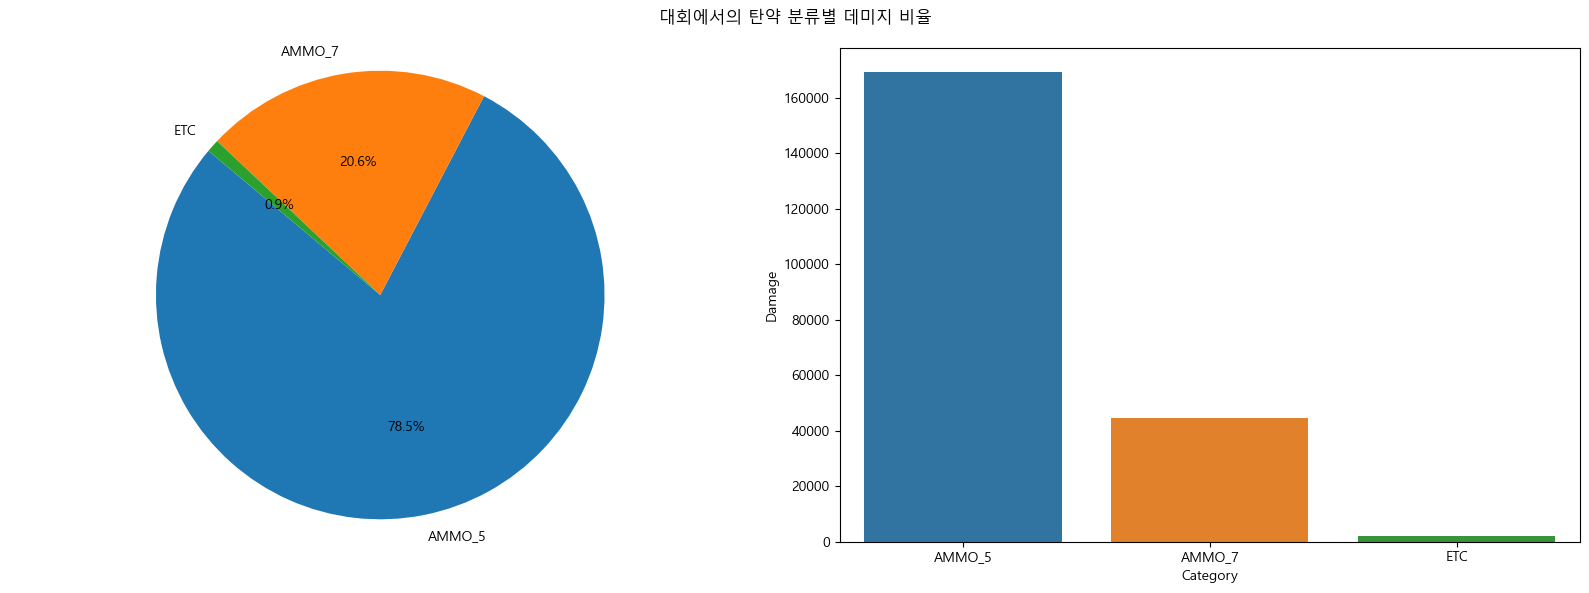

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1행 2열의 서브플롯 생성

# 첫 번째 그래프 (파이 차트)
ax1.pie(grouped_ammo['damage'], labels=grouped_ammo['Category'], autopct='%1.1f%%', startangle=140)
ax1.axis('equal')

# 두 번째 그래프 (막대 그래프)
sns.barplot(x='Category', y='damage', data=grouped_ammo, ax=ax2)
ax2.set_xlabel('Category')
ax2.set_ylabel('Damage')

fig.suptitle('대회에서의 탄약 분류별 데미지 비율')
plt.tight_layout()
plt.show()

---

### 대회에서 선수들은 어떤 총으로 교전을 했을까 
#### 2. AR/ DMR별 탄약 분류별 총기 사용 비율
#### (SR은 7탄만 있기 때문에 제외)

In [137]:
AMMO_5_AR = ["WeapHK416_C", "WeapSCAR-L_C", "WeapM16A4_C", "WeapFamasG2_C", "WeapAUG_C", "WeapM249_C",
             "WeapG36C_C", "WeapK2_C",]
AMMO_5_DMR = ["WeapMini14_C", "WeapMk12_C"]

AMMO_7_AR = ["WeapBerylM762_C", "WeapACE32_C", "WeapAK47_C", "WeapMk47Mutant_C", "WeapGroza_C",
          "WeapMG3_C"]
AMMO_7_DMR = ["WeapSKS_C","WeapFNFal_C", "WeapDragunov_C", "WeapMk14_C"]

def classify_ammo_weapon(weapon_name):
    if weapon_name in AMMO_5_AR:
        return 'AMMO_5_AR'
    elif weapon_name in AMMO_5_DMR:
        return 'AMMO_5_DMR'
    elif weapon_name in AMMO_7_AR:
        return 'AMMO_7_AR'
    elif weapon_name in AMMO_7_DMR:
        return 'AMMO_7_DMR'    
    else:
        return 'ETC'
    
weapon_df['Category'] = weapon_df['weapon'].apply(classify_ammo_weapon)

grouped_ammo = weapon_df.groupby('Category')['damage'].sum().reset_index()
grouped_ammo = grouped_ammo.sort_values(by='damage', ascending=False)
grouped_ammo

,Category,damage
1,AMMO_5_DMR,90320.571558
0,AMMO_5_AR,79065.401742
3,AMMO_7_DMR,23106.815107
2,AMMO_7_AR,19816.798085
4,ETC,3593.732126


In [19]:
# 'AR'과 'DMR' 카테고리를 필터링하여 따로 추출
ar_df = grouped_ammo[grouped_ammo['Category'].str.endswith('_AR')]
ar_df['Category'] = ar_df['Category'].apply(lambda x: x.replace('_AR', ''))

dmr_df = grouped_ammo[grouped_ammo['Category'].str.endswith('_DMR')]
dmr_df['Category'] = dmr_df['Category'].apply(lambda x: x.replace('_DMR', ''))

C:\Users\57187\AppData\Local\Temp\ipykernel_23980\784048343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ar_df['Category'] = ar_df['Category'].apply(lambda x: x.replace('_AR', ''))
C:\Users\57187\AppData\Local\Temp\ipykernel_23980\784048343.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dmr_df['Category'] = dmr_df['Category'].apply(lambda x: x.replace('_DMR', ''))


,Category,damage
0,AMMO_5,79065.401742
2,AMMO_7,19816.798085


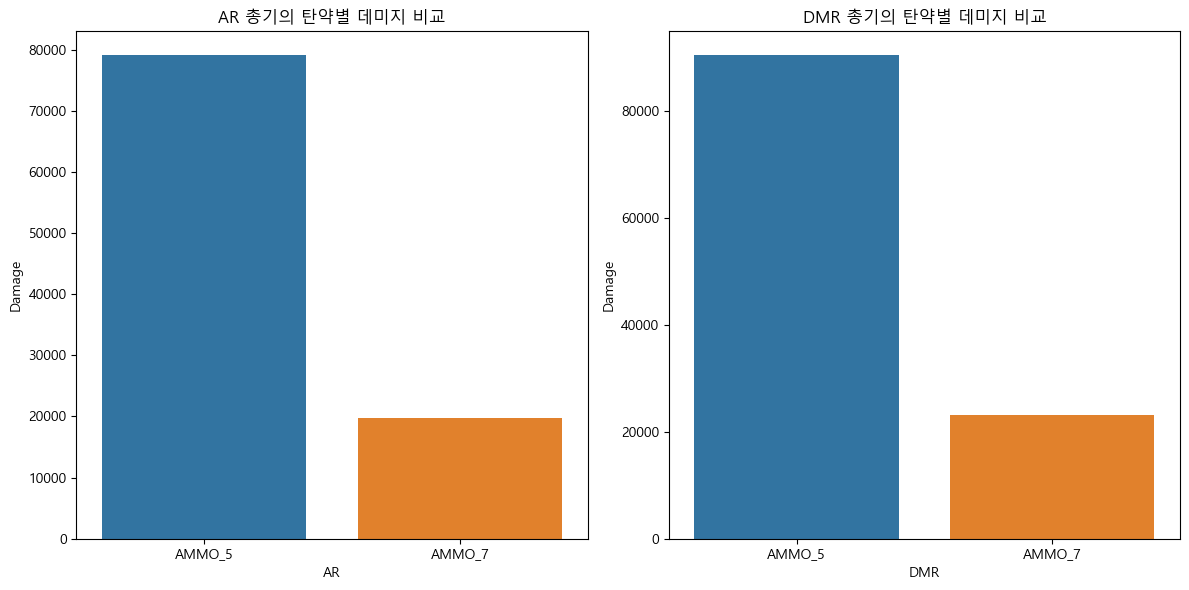

In [20]:
# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 두 개의 그래프를 나란히 그리기 위해
sns.barplot(x='Category', y='damage', data=ar_df)
plt.xlabel('AR')
plt.ylabel('Damage')
plt.title('AR 총기의 탄약별 데미지 비교')

plt.subplot(1, 2, 2)
sns.barplot(x='Category', y='damage', data=dmr_df)
plt.xlabel('DMR')
plt.ylabel('Damage')
plt.title('DMR 총기의 탄약별 데미지 비교')

plt.tight_layout()  # 그래프 간 간격 조절
plt.show()

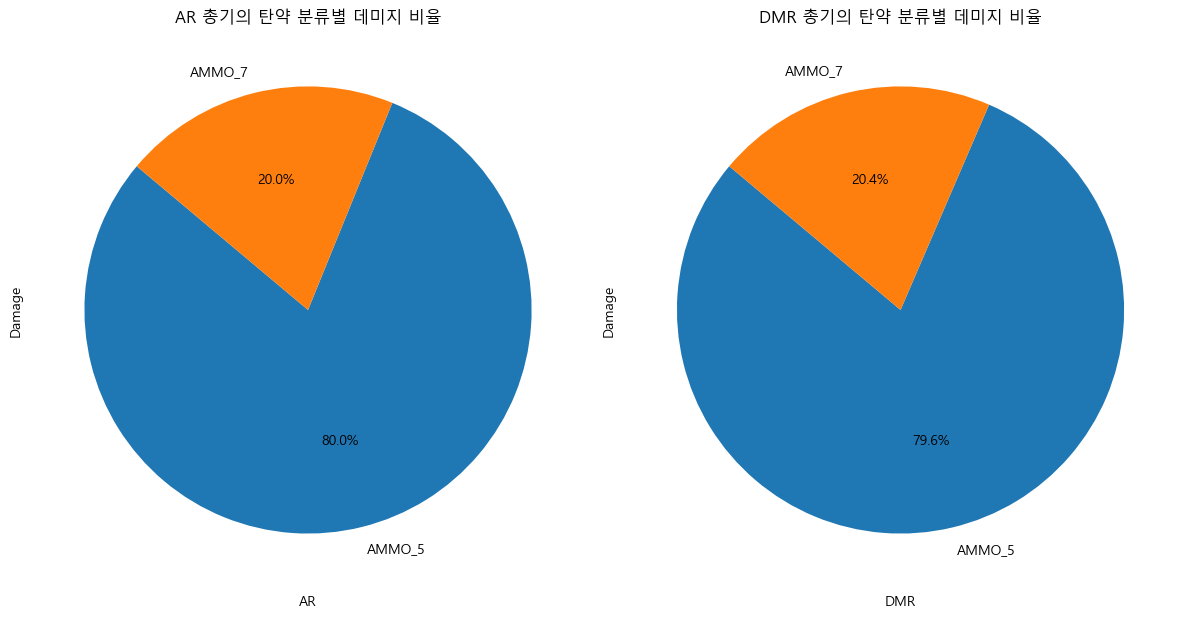

In [25]:
# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 두 개의 그래프를 나란히 그리기 위해
plt.pie(ar_df['damage'], labels=ar_df['Category'], autopct='%1.1f%%', startangle=140)
plt.xlabel('AR')
plt.ylabel('Damage')
plt.title('AR 총기의 탄약 분류별 데미지 비율')

plt.subplot(1, 2, 2)
plt.pie(dmr_df['damage'], labels=dmr_df['Category'], autopct='%1.1f%%', startangle=140)
plt.xlabel('DMR')
plt.ylabel('Damage')
plt.title('DMR 총기의 탄약 분류별 데미지 비율')

plt.tight_layout()  # 그래프 간 간격 조절
plt.show()

---

In [37]:
weapon_df = damage_s_matches[damage_s_matches['weapon'].str.startswith('Weap')]
weapon_df = weapon_df[~weapon_df['weapon'].str.contains('WeapPanzerFaust100M1_C')]
weapon_df

weapon_df['Category'] = weapon_df['weapon'].apply(classify_ammo_weapon)
weapon_df

,teamid,name,weapon,damage,Category
10,1,CES_HaiSaki,WeapAUG_C,98.571686,AMMO_5_AR
11,1,CES_HaiSaki,WeapBerylM762_C,99.940148,AMMO_7_AR
12,1,CES_HaiSaki,WeapDragunov_C,93.826920,AMMO_7_DMR
13,1,CES_HaiSaki,WeapG36C_C,267.532511,AMMO_5_AR
14,1,CES_HaiSaki,WeapHK416_C,506.067211,AMMO_5_AR
...,...,...,...,...,...
917,16,TWIS_spyrro,WeapAUG_C,1602.914918,AMMO_5_AR
918,16,TWIS_spyrro,WeapBerylM762_C,79.795840,AMMO_7_AR
919,16,TWIS_spyrro,WeapHK416_C,148.953010,AMMO_5_AR
920,16,TWIS_spyrro,WeapMini14_C,393.139406,AMMO_5_DMR


In [68]:
grouped_df = weapon_df.groupby(['weapon', 'Category'])['damage'].sum().reset_index()
grouped_df = grouped_df[grouped_df['Category'] != 'ETC']
grouped_df.sort_values(by='damage', ascending=False)

,weapon,Category,damage
2,WeapAUG_C,AMMO_5_AR,62198.556901
22,WeapMk12_C,AMMO_5_DMR,46052.739283
21,WeapMini14_C,AMMO_5_DMR,44267.832275
5,WeapBerylM762_C,AMMO_7_AR,14158.003371
13,WeapHK416_C,AMMO_5_AR,13762.269263
9,WeapFNFal_C,AMMO_7_DMR,11588.860761
8,WeapDragunov_C,AMMO_7_DMR,8980.967254
0,WeapACE32_C,AMMO_7_AR,3644.337343
28,WeapSKS_C,AMMO_7_DMR,1968.675450
17,WeapM249_C,AMMO_5_AR,1469.380165


In [74]:
# Category와 weapon 별로 damage 합계 계산
category_weapon_sum = grouped_df.groupby(['Category', 'weapon'])['damage'].sum().reset_index()

# Category 별로 damage가 높은 순서대로 상위 3개의 weapon 선택
top_weapons = category_weapon_sum.groupby('Category', group_keys=False).apply(lambda x: x.nlargest(3, 'damage'))
top_weapons

,Category,weapon,damage
0,AMMO_5_AR,WeapAUG_C,62198.556901
3,AMMO_5_AR,WeapHK416_C,13762.269263
6,AMMO_5_AR,WeapM249_C,1469.380165
9,AMMO_5_DMR,WeapMk12_C,46052.739283
8,AMMO_5_DMR,WeapMini14_C,44267.832275
12,AMMO_7_AR,WeapBerylM762_C,14158.003371
10,AMMO_7_AR,WeapACE32_C,3644.337343
13,AMMO_7_AR,WeapGroza_C,723.872023
17,AMMO_7_DMR,WeapFNFal_C,11588.860761
16,AMMO_7_DMR,WeapDragunov_C,8980.967254


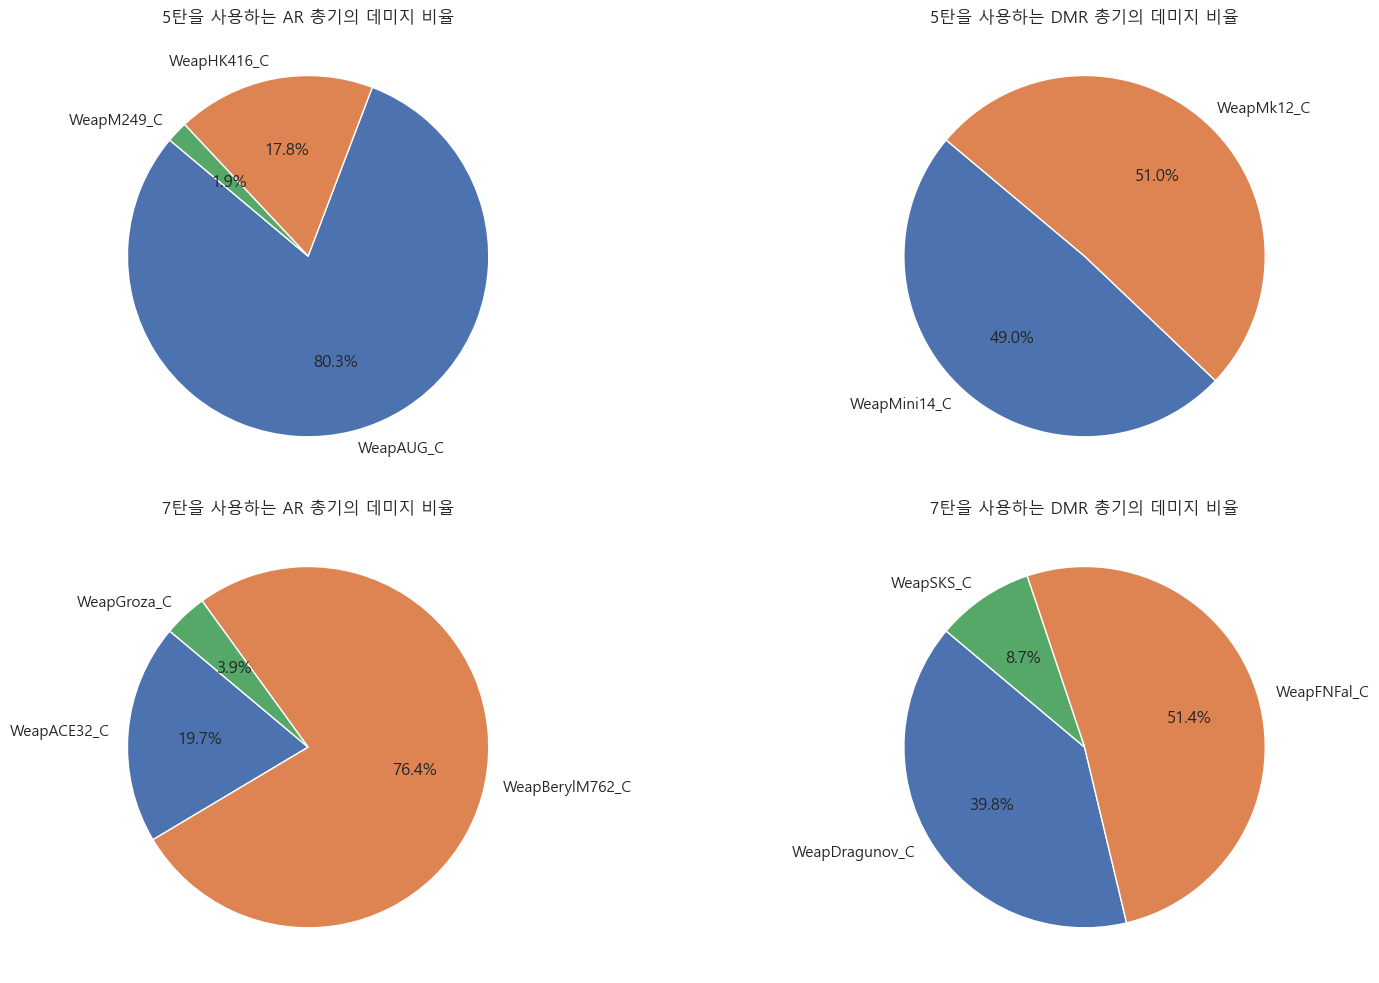

In [100]:
# AMMO 카테고리에서 AR과 DMR 분리
ammo_5_ar = top_weapons[(top_weapons['Category'].str.contains('AMMO_5')) & (top_weapons['Category'].str.contains('AR'))]
ammo_5_dmr = top_weapons[(top_weapons['Category'].str.contains('AMMO_5')) & (top_weapons['Category'].str.contains('DMR'))]

ammo_7_ar = top_weapons[(top_weapons['Category'].str.contains('AMMO_7')) & (top_weapons['Category'].str.contains('AR'))]
ammo_7_dmr = top_weapons[(top_weapons['Category'].str.contains('AMMO_7')) & (top_weapons['Category'].str.contains('DMR'))]

# 각 부분별 손상(damage) 합계 계산
ammo_5_ar_damage = ammo_5_ar.groupby('weapon')['damage'].sum()
ammo_5_dmr_damage = ammo_5_dmr.groupby('weapon')['damage'].sum()

ammo_7_ar_damage = ammo_7_ar.groupby('weapon')['damage'].sum()
ammo_7_dmr_damage = ammo_7_dmr.groupby('weapon')['damage'].sum()

# 파이차트 그리기
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

axes[0][0].pie(ammo_5_ar_damage, labels=ammo_5_ar_damage.index, autopct='%1.1f%%', startangle=140)
axes[0][0].set_title('5탄을 사용하는 AR 총기의 데미지 비율')
axes[0][1].pie(ammo_5_dmr_damage, labels=ammo_5_dmr_damage.index, autopct='%1.1f%%', startangle=140)
axes[0][1].set_title('5탄을 사용하는 DMR 총기의 데미지 비율')
axes[1][0].pie(ammo_7_ar_damage, labels=ammo_7_ar_damage.index, autopct='%1.1f%%', startangle=140)
axes[1][0].set_title('7탄을 사용하는 AR 총기의 데미지 비율')
axes[1][1].pie(ammo_7_dmr_damage, labels=ammo_7_dmr_damage.index, autopct='%1.1f%%', startangle=140)
axes[1][1].set_title('7탄을 사용하는 DMR 총기의 데미지 비율')

plt.tight_layout()
plt.show()

c:\Users\57187\anaconda3\envs\torch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


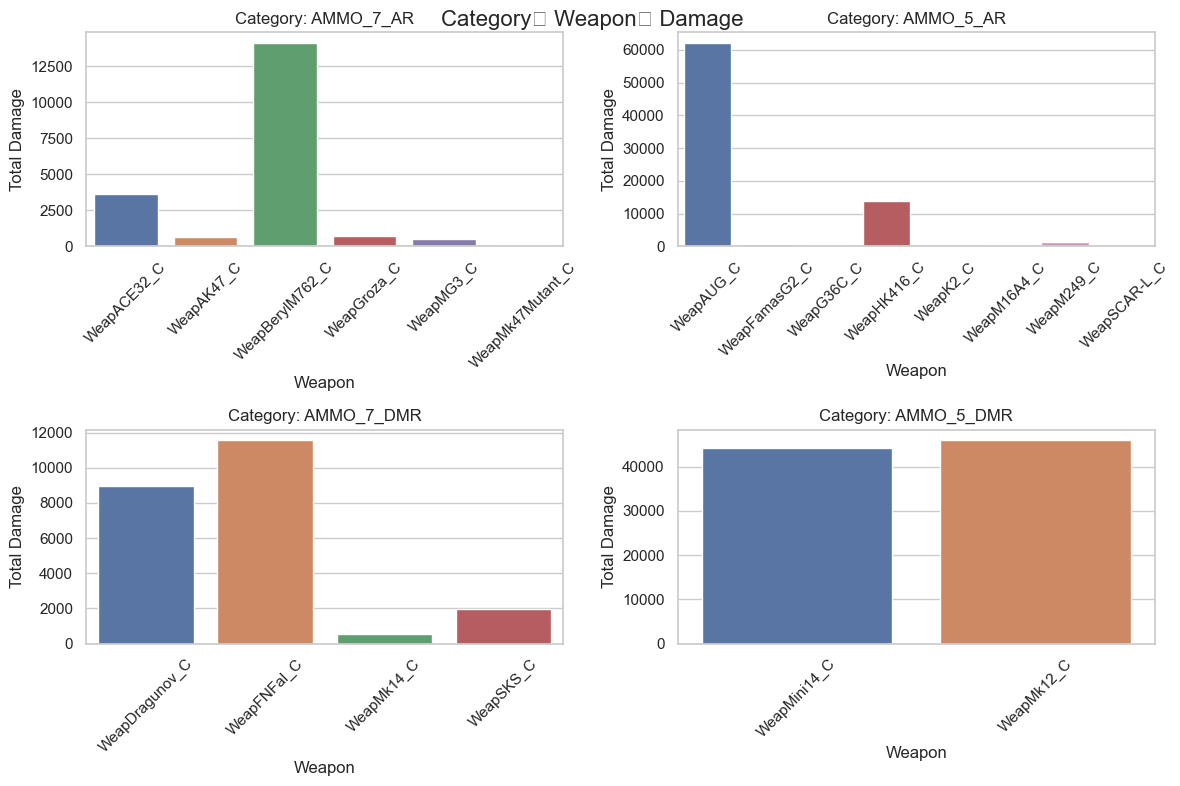

In [48]:
# Category별로 barplot 그리기
categories = grouped_df['Category'].unique()
plt.figure(figsize=(12, 8))
for i, category in enumerate(categories):
    plt.subplot(2, 2, i + 1)  # 2x2 그래프 영역 설정
    category_df = grouped_df[grouped_df['Category'] == category]
    sns.barplot(x='weapon', y='damage', data=category_df)
    plt.title(f'Category: {category}')
    plt.xlabel('Weapon')
    plt.ylabel('Total Damage')
    plt.xticks(rotation=45)

plt.tight_layout()  # 그래프 간격 조정
plt.suptitle('Category별 Weapon별 Damage', fontsize=16)
plt.show()